In [1]:
import pandas as pd

In [2]:
bikes = pd.read_csv("bikes.csv")

In [3]:
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [5]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


<AxesSubplot:xlabel='temperature', ylabel='rentals'>

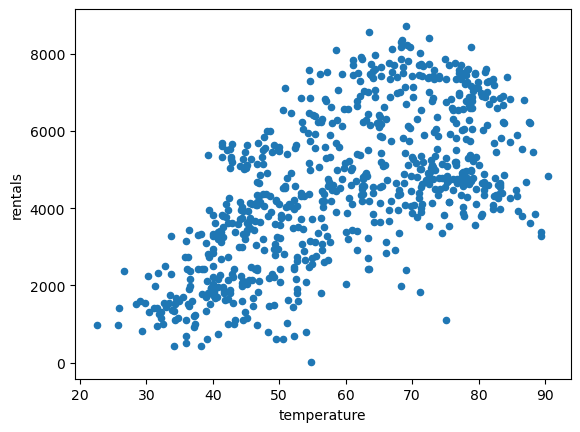

In [6]:
%matplotlib inline
bikes.plot(kind="scatter", x='temperature', y='rentals')

<AxesSubplot:xlabel='rentals', ylabel='humidity'>

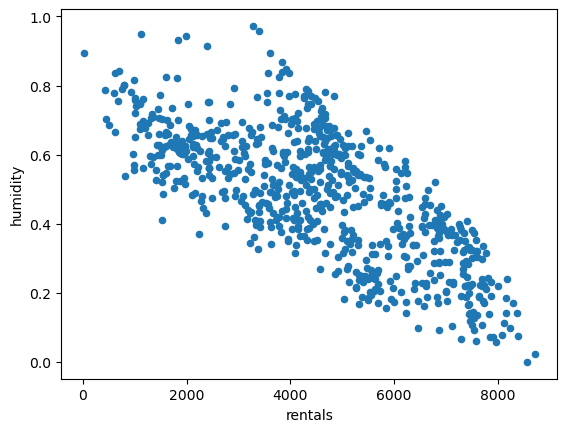

In [7]:
bikes.plot(kind='scatter', x='rentals', y='humidity')

<AxesSubplot:xlabel='rentals', ylabel='windspeed'>

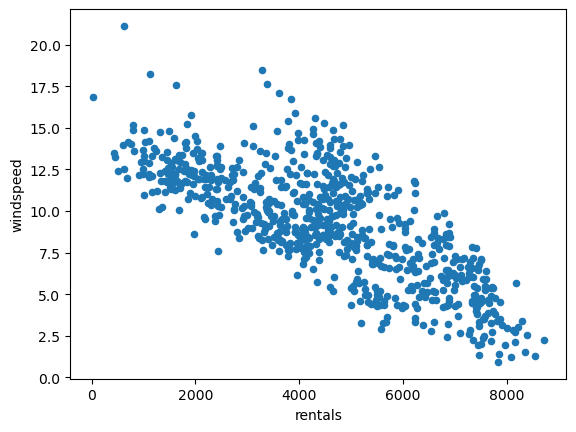

In [9]:
bikes.plot(kind='scatter', x='rentals', y='windspeed')

## Preparing the data

In [14]:
response = 'rentals'
y = bikes[[response]]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [15]:
predictors = list(bikes.columns)
predictors.remove(response)
x = bikes[predictors]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [25]:
# Sampling the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, random_state=1234)

## Training the model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression().fit(Xtrain,Ytrain)

In [28]:
model.intercept_

array([3800.68469948])

In [31]:
model.coef_

array([[   80.35314543, -4665.73867387,  -196.21650368]])

## Evaluating the model

In [32]:
model.score(Xtest, Ytest)

0.9820623857913312

In [33]:
y_pred = model.predict(Xtest)

In [34]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(Ytest, y_pred)

194.31620720519675